In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import calendar
from pprint import pprint
from sv_api_keys import g_key
file2019 = "2019.csv"
file2020 = "2020.csv"

crime_data2019 = pd.read_csv(file2019,low_memory=False)
crime_data2020 = pd.read_csv(file2020,low_memory=False)



ModuleNotFoundError: No module named 'sv_api_keys'

In [2]:
#Grab only a few needed columns from main data set for line graphs

crime_data_selection_2019 = crime_data2019[["Incident Number", "Highest Offense Description", "Highest Offense Code", "Family Violence", "Occurred Date", "Occurred Time", "Report Date Time", "Location Type", "Address", "Zip Code"]]
crime_data_selection_2019 = crime_data_selection_2019.copy()
crime_data_selection_2019["Month Occurred"] = pd.DatetimeIndex(crime_data_selection_2019["Occurred Date"]).month
crime_data_selection_2019["Month Occurred"] = crime_data_selection_2019["Month Occurred"].apply(lambda x: calendar.month_name[x])
crime_data_selection_months_2019 = crime_data_selection_2019[["Highest Offense Description","Month Occurred"]]

crime_data_selection_2020 = crime_data2020[["Incident Number", "Highest Offense Description", "Highest Offense Code", "Family Violence", "Occurred Date", "Occurred Time", "Report Date Time", "Location Type", "Address", "Zip Code"]]
crime_data_selection_2020 = crime_data_selection_2020.copy()
crime_data_selection_2020["Month Occurred"] = pd.DatetimeIndex(crime_data_selection_2020["Occurred Date"]).month
crime_data_selection_2020["Month Occurred"] = crime_data_selection_2020["Month Occurred"].apply(lambda x: calendar.month_name[x])
crime_data_selection_months_2020 = crime_data_selection_2020[["Highest Offense Description","Month Occurred"]]




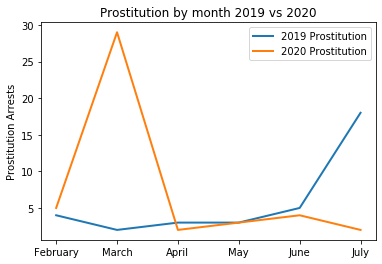

In [4]:
#PROSTITUTION by month

prostitution2019bymonth = crime_data_selection_months_2019[crime_data_selection_months_2019['Highest Offense Description'].str.contains("PROSTITUTION")]
summary_prostitution_by_month_2019 = prostitution2019bymonth.groupby("Month Occurred").count()


prostitution2020bymonth = crime_data_selection_months_2020[crime_data_selection_months_2020['Highest Offense Description'].str.contains("PROSTITUTION")]
summary_prostitution_by_month_2020 = prostitution2020bymonth.groupby("Month Occurred").count()


month_order = ['February', 'March', 'April', 'May', 'June', 'July']
summary_prostitution_by_month_2019 = summary_prostitution_by_month_2019.reindex(month_order, axis=0)
summary_prostitution_by_month_2020 = summary_prostitution_by_month_2020.reindex(month_order, axis=0)

plt.plot(summary_prostitution_by_month_2019,label='2019 Prostitution', linewidth=2)
plt.plot(summary_prostitution_by_month_2020,label='2020 Prostitution', linewidth=2)
plt.legend()
plt.ylabel("Prostitution Arrests")
plt.title("Prostitution by month 2019 vs 2020")
plt.show()

Prostitution increased by 28.57 percent in 2020!


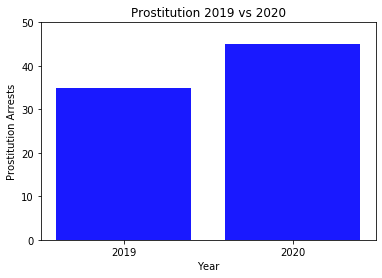

In [5]:
#Prostitution bar graph 2019 vs 2020

prostitution2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("PROSTITUTION")]
prostitution2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("PROSTITUTION")]

prostitution_count2019 = prostitution2019["Address"].count()
prostitution_count2020 = prostitution2020["Address"].count()
counts =[prostitution_count2019,prostitution_count2020]
x_axis = np.arange(len(counts))

proinc = ((prostitution_count2020)-(prostitution_count2019)) / (prostitution_count2019)

print(f"Prostitution increased by {round(proinc * 100,2)} percent in 2020!")
                                          
plt.bar(x_axis, counts, color='b', alpha=0.9, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2019", "2020"])
plt.ylim(0,50)
plt.title("Prostitution 2019 vs 2020")
plt.xlabel("Year")
plt.ylabel("Prostitution Arrests")
plt.show()